In [176]:
import warnings 
warnings.filterwarnings('ignore')

# Importing required libs

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc,roc_curve

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [51]:
#Not able to open up the URL to get the dataset. We already have the Iris.csv file dataset from earlier assignment locally so using it to import here

irisDf=pd.read_csv("iris.csv")
irisDf.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [52]:
irisDf.isnull().values.any()

False

In [53]:
#There are no null / missing values in dataframe. If any missing value then we can replace them with median as below
#   irisDf.fillna(irisDf.mean())

In [54]:
irisDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [55]:
irisDf.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [56]:
# I am using this method to convert the Class column to respective catagory code. 
irisDf["Class"]=irisDf.Class.astype('category').cat.codes

In [57]:
irisDf.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                      int8
dtype: object

In [58]:
irisDf.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [59]:
irisDf.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [60]:
#From above we see that no column has correlation in range -0.1 to 0.1 therefore no variables would be dropped.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [61]:
irisDf.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [62]:
#From above we see that no column has variance <0.1 therefore no variables would be dropped.

## Question 6

*Plot the scatter matrix for all the variables.*

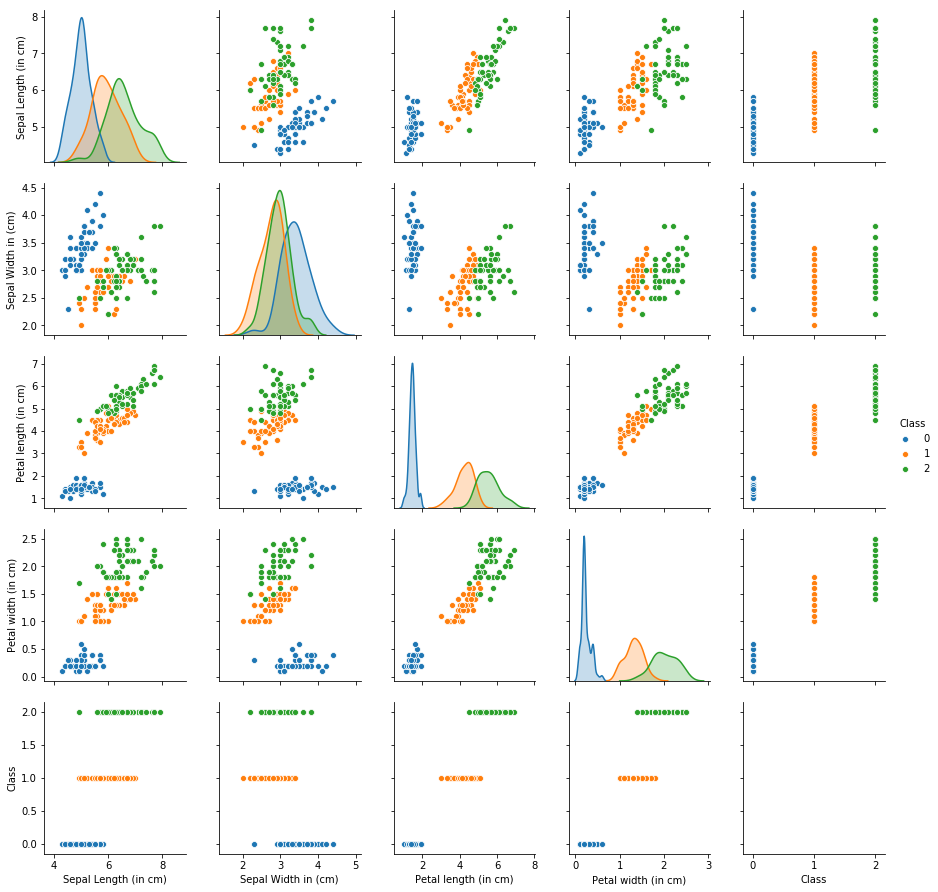

In [63]:
sns.pairplot(irisDf,hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [125]:
#Create X and Y sets as features and target attributes sets.
X = irisDf.drop("Class", axis=1)
y = irisDf["Class"]

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [126]:
# Call Nearest Neighbour algorithm for K=3
NNH1 = KNeighborsClassifier(n_neighbors= 3)
NNH1.fit(X_train, y_train)


# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels1 = NNH1.predict(X_test)

#NNH1.score(X_test, y_test)
score1=accuracy_score(y_test, predicted_labels1)
print(score1)

0.9


In [127]:
# Call Nearest Neighbour algorithm for K=5
NNH2 = KNeighborsClassifier(n_neighbors= 5)
NNH2.fit(X_train, y_train)


# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels2 = NNH2.predict(X_test)

#NNH2.score(X_test, y_test)
score2=accuracy_score(y_test, predicted_labels2)
print(score2)

0.9


In [128]:
# Call Nearest Neighbour algorithm for K=9
NNH3 = KNeighborsClassifier(n_neighbors= 9)
NNH3.fit(X_train, y_train)


# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels3 = NNH3.predict(X_test)

#NNH3.score(X_test, y_test)

score3=accuracy_score(y_test, predicted_labels3)
print(score3)

0.9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [123]:
#Creating a array and loop to get the scores for K's

kList=(1,3,5,7,9,11,13,15,17,19)

#empty list to store scores
scores=[]   

# perform 10-fold cross validation
for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    
# changing to misclassification error
MSE = [1 - x for x in scores]

# determining best k
best_k = kList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 13


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

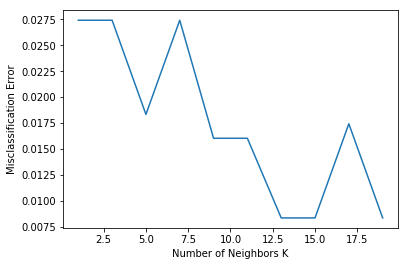

In [124]:
# plot misclassification error vs k
plt.plot(kList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#From above we see that the best K is around 13 and it has lowest MSE

# Naive Bayes with Iris Data

In [218]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [219]:
#From the dataset I have 'Species' is 'Class' variable in my dataset. I will use the same

y = irisDf["Class"]   #dependent variable 

X = irisDf.drop("Class", axis=1)  #independent variables


In [131]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int8
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [199]:
y.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Class, dtype: float64

In [200]:
#The class distribution is equal. 
irisDf.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


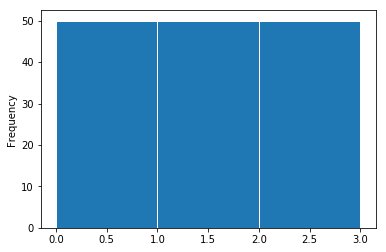

In [162]:
#Histogram of Class variable with bins 0-1,1-2,2-3
pd.Series(y).plot(kind='hist', edgecolor='white', linewidth=1,bins=[0,1,2,3])

In [152]:
#Drop Id variable from data
#The dataframe dont have Id column but it can be dropped using irisDf.drop("id",axis=1)

### Question 12 
Find Correlation among all variables and give your insights 

In [1]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [163]:
irisDf.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and test set in 80:20.

In [221]:

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Question 14 
Train and Fit NaiveBayes Model

In [222]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None)


In [223]:
#Predict
predicted = model.predict(X_test)
predicted

array([2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2], dtype=int8)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [224]:
# show Confusion Matrix
metrics.confusion_matrix(y_test, predicted)

array([[7, 0, 0],
       [0, 9, 3],
       [0, 2, 9]], dtype=int64)

In [228]:
# show accuracy
model_score = model.score(X_test, y_test)
model_score

0.8333333333333334

In [ ]:
#Show precision and Recall metrics

In [229]:
#Precision and Recall
THRESHOLD = 0.32

preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds,average=None),
                   precision_score(y_test, preds,average=None)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.566667
recall,"[1.0, 0.8333333333333334, 0.0]"
precision,"[0.3888888888888889, 0.8333333333333334, 0.0]"


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [15]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779